In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.neighbors import KNeighborsClassifier

In [2]:
def feature_selection_RandomForest(db_full):
    """Функция отбора признаков методом случайного леса. Функция возвращает
    обученную модель"""
    
    #отбор признаков с помощью модели случайного леса

    X = db_full.select_dtypes(exclude=['object']).copy()
    X.drop(columns=['Flow Byts/s', 'Flow Pkts/s', 'Category_Label'],
           axis = 1, inplace=True)
    y = db_full['Category_Label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
    X_train.shape, y_train.shape

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    
    
    return clf, X

In [3]:
def encode_class(db):
    """Функция кодирует метки класса и возвращает датасет с новым признаком Category_Label"""
    categories = {}
    for key, value in enumerate(db['Label'].unique()):
        categories[value] = key + 1
    db['Category_Label'] = db['Label'].map(categories)
    
    return db

In [18]:
def preparing_data(db_full):
    """Функция кодирует метки целевого признака. Отбирает признаки методом случайного леса. 
    Возвращает готовые для обучения моделей данные"""    
    
    #кодирование меток
    
    db_full = encode_class(db_full)

    #исключение признаков адресации
    
    columns = db_full.columns
    if 'Flow ID' not in columns:
        db_full.drop(columns=['Dst Port', 'Timestamp', 'Protocol'],
                axis = 1, inplace=True)
    if 'Flow ID' in columns:
        db_full.drop(columns=['Flow ID', 'Src IP', 'Src Port',
                        'Dst IP', 'Dst Port', 'Timestamp', 'Protocol'],
                axis = 1, inplace=True)
    
    #Вызов функции отбора признаков методом случайного леса
    clf, X = feature_selection_RandomForest(db_full)
    
    importnace_features = pd.Series(clf.feature_importances_, X.columns).sort_values(ascending = False)
    importnace_features = importnace_features.head(n = 8)
    

    #Переменная для вывода типов атак в каждом из файлов
    types_at = db_full['Label'].unique()
    
    return importnace_features, types_at

In [10]:
%%time
db_full_1 = pd.read_csv('02-14-2018.csv')

CPU times: user 8.73 s, sys: 2.12 s, total: 10.9 s
Wall time: 13.7 s


In [20]:
%%time
db_full_2 = pd.read_csv('02-15-2018.csv')

CPU times: user 7.67 s, sys: 1.75 s, total: 9.42 s
Wall time: 10.2 s


In [31]:
%%time
db_full_3 = pd.read_csv('02-16-2018.csv')

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/execution.py:1324: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 8.18 s, sys: 2.72 s, total: 10.9 s
Wall time: 11.4 s


In [33]:
%%time
db_full_4 = pd.read_csv('02-20-2018.csv')

CPU times: user 1min 23s, sys: 51.9 s, total: 2min 15s
Wall time: 2min 32s


In [34]:
%%time
db_full_5 = pd.read_csv('02-21-2018.csv')

CPU times: user 6.51 s, sys: 1.51 s, total: 8.02 s
Wall time: 8.2 s


In [44]:
%%time
db_full_6 = pd.read_csv('02-22-2018.csv')

CPU times: user 7.78 s, sys: 1.99 s, total: 9.77 s
Wall time: 11 s


In [49]:
%%time
db_full_7 = pd.read_csv('02-23-2018.csv')

CPU times: total: 5.47 s
Wall time: 5.64 s


In [50]:
%%time
db_full_8 = pd.read_csv('02-28-2018.csv')

CPU times: total: 3.03 s
Wall time: 3.1 s


In [51]:
%%time
db_full_9 = pd.read_csv('03-01-2018.csv')

CPU times: total: 1.48 s
Wall time: 1.51 s


In [52]:
%%time
db_full_10 = pd.read_csv('03-02-2018.csv')

CPU times: total: 5.81 s
Wall time: 5.94 s


## Выбор наиболее значимых признаков

In [11]:
%%time
importnace_feateres_1, types_at_1 = preparing_data(db_full_1)

CPU times: user 1min 58s, sys: 3.25 s, total: 2min 1s
Wall time: 2min 4s


In [12]:
importnace_feateres_1

Fwd Seg Size Min     0.183237
Init Fwd Win Byts    0.085190
Bwd Pkts/s           0.068045
Fwd Pkts/s           0.066423
Flow IAT Mean        0.055750
Fwd Header Len       0.044705
Flow Duration        0.042358
Flow IAT Max         0.039934
dtype: float64

In [21]:
%%time
importnace_feateres_2, types_at_2 = preparing_data(db_full_2)

CPU times: user 2min 54s, sys: 4.66 s, total: 2min 59s
Wall time: 3min 15s


In [54]:
%%time
importnace_feateres_3, types_at_3 = preparing_data(db_full_3)

CPU times: total: 2min 39s
Wall time: 2min 39s


In [43]:
%%time
importnace_feateres_4, types_at_4 = preparing_data(db_full_4)

CPU times: total: 29min 27s
Wall time: 31min 19s


In [44]:
importnace_feateres_4

Index(['Fwd Pkt Len Max', 'TotLen Fwd Pkts', 'Flow IAT Min', 'Flow Duration',
       'Fwd Seg Size Avg', 'Subflow Fwd Byts', 'Fwd IAT Tot', 'Fwd IAT Mean'],
      dtype='object')

In [35]:
%%time
importnace_feateres_5, types_at_5 = preparing_data(db_full_5)

CPU times: user 1min 39s, sys: 3.45 s, total: 1min 42s
Wall time: 1min 47s


In [45]:
%%time
importnace_feateres_6, types_at_6 = preparing_data(db_full_6)

CPU times: user 3min 28s, sys: 4.42 s, total: 3min 33s
Wall time: 3min 36s


In [57]:
%%time
importnace_feateres_7, types_at_7 = preparing_data(db_full_7)

CPU times: total: 6min 54s
Wall time: 7min 14s


In [58]:
%%time
importnace_feateres_8, types_at_8 = preparing_data(db_full_8)

CPU times: total: 9min
Wall time: 9min 26s


In [59]:
%%time
importnace_feateres_9, types_at_9 = preparing_data(db_full_9)

CPU times: total: 1min 47s
Wall time: 1min 49s


In [60]:
%%time
importnace_feateres_10, types_at_10 = preparing_data(db_full_10)

CPU times: total: 3min 18s
Wall time: 3min 21s


#### Функция pd.concat объединяет наборы данных

## Таблица важности признаков для отдельных атак

In [61]:
im_f_2 = pd.DataFrame([importnace_feateres_1.index, importnace_feateres_2.index,
                       importnace_feateres_3.index, importnace_feateres_4.index,
                       importnace_feateres_5.index, importnace_feateres_6.index,
                       importnace_feateres_7.index, importnace_feateres_8.index,
                       importnace_feateres_9.index, importnace_feateres_10.index])
ty_a = pd.DataFrame([types_at_1, types_at_2, types_at_3, types_at_4,
                     types_at_5, types_at_6, types_at_7, types_at_8,
                     types_at_9, types_at_10])

In [62]:
main_features = pd.concat([im_f_2, ty_a], sort=False, axis=1)
main_features

,0,1,2,3,4,5,6,7,0,1,2,3
0,Fwd Seg Size Min,Bwd Pkts/s,Init Fwd Win Byts,Flow Duration,Fwd Pkts/s,Flow IAT Max,Flow IAT Mean,Fwd Header Len,Benign,FTP-BruteForce,SSH-Bruteforce,None
1,Fwd Seg Size Min,Init Fwd Win Byts,Fwd Header Len,Flow IAT Max,Bwd IAT Max,Flow Duration,Flow IAT Min,Fwd Pkts/s,Benign,DoS attacks-GoldenEye,DoS attacks-Slowloris,None
2,Bwd IAT Min,Fwd Header Len,Fwd Pkt Len Max,Fwd Pkt Len Std,Fwd Seg Size Avg,Fwd Pkts/s,Fwd IAT Tot,Fwd IAT Max,Benign,DoS attacks-SlowHTTPTest,DoS attacks-Hulk,None
3,Fwd Pkt Len Max,TotLen Fwd Pkts,Flow IAT Min,Flow Duration,Fwd Seg Size Avg,Subflow Fwd Byts,Fwd IAT Tot,Fwd IAT Mean,Benign,DDoS attacks-LOIC-HTTP,None,None
4,Fwd Header Len,Subflow Fwd Pkts,Fwd Pkt Len Mean,TotLen Fwd Pkts,Subflow Fwd Byts,Tot Fwd Pkts,Fwd IAT Min,Init Bwd Win Byts,Benign,DDOS attack-LOIC-UDP,DDOS attack-HOIC,None
5,Init Fwd Win Byts,TotLen Fwd Pkts,Subflow Fwd Byts,RST Flag Cnt,ECE Flag Cnt,Bwd Pkt Len Max,Fwd Act Data Pkts,Pkt Len Var,Benign,Brute Force -Web,Brute Force -XSS,SQL Injection
6,Init Fwd Win Byts,Flow IAT Min,Bwd Pkt Len Max,Flow Duration,TotLen Fwd Pkts,Fwd IAT Min,Flow IAT Mean,Fwd IAT Mean,Benign,Brute Force -Web,Brute Force -XSS,SQL Injection
7,Flow IAT Max,Flow Duration,Fwd Pkts/s,Flow IAT Mean,Flow IAT Min,Bwd Pkts/s,Init Fwd Win Byts,Fwd IAT Tot,Benign,Infilteration,None,None
8,Flow IAT Min,Flow IAT Mean,Fwd Pkts/s,Flow Duration,Flow IAT Max,Bwd Pkts/s,Init Fwd Win Byts,Fwd Seg Size Min,Benign,Infilteration,None,None
9,Fwd IAT Mean,Fwd IAT Max,Init Fwd Win Byts,Bwd Seg Size Avg,Flow IAT Mean,Fwd Pkts/s,Flow IAT Max,Fwd IAT Tot,Benign,Bot,None,None


<AxesSubplot:title={'center':'Значимость признаков для атак типа - BruteForce Web, XSS .6.'}>

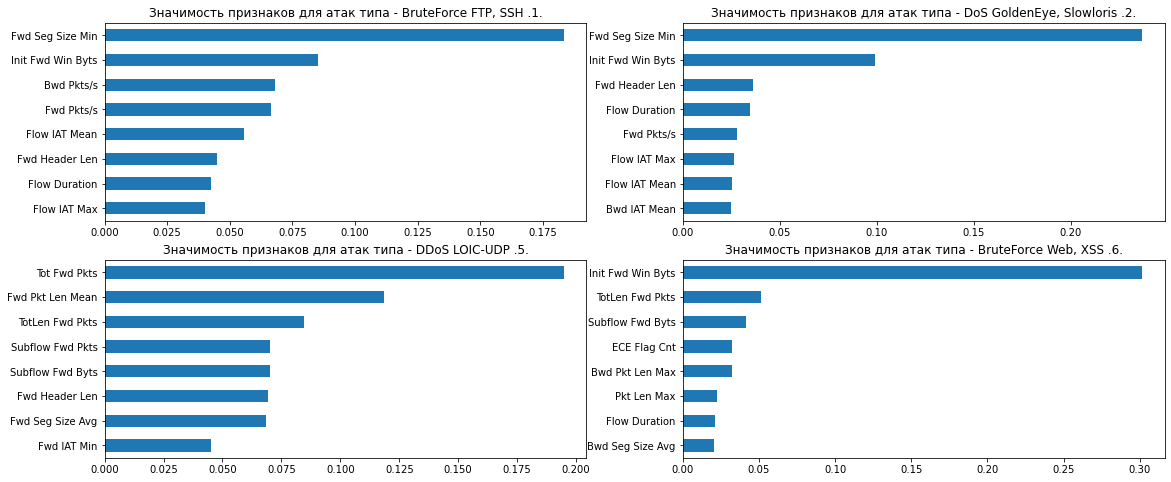

In [46]:
plt.figure(figsize=(19,8))
plt.subplot(2,2,1)
importnace_feateres_1\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - BruteForce FTP, SSH .1.')
plt.subplot(2,2,2)
importnace_feateres_2\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - DoS GoldenEye, Slowloris .2.')
plt.subplot(2,2,3)
importnace_feateres_5\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - DDoS LOIC-UDP .5.')
plt.subplot(2,2,4)
importnace_feateres_6\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - BruteForce Web, XSS .6.')

In [70]:
col_cont_main_features = ['Fwd Seg Size Min', 'Bwd IAT Min', 'Fwd Pkt Len Max', 'Fwd Header Len', 
                          'Init Fwd Win Byts','Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Mean', 'Label']

In [81]:
%%time
db_1 = db_full_1[col_cont_main_features]
db_2 = db_full_2[col_cont_main_features]
db_3 = db_full_3[col_cont_main_features]
db_4 = db_full_4[col_cont_main_features]
db_5 = db_full_5[col_cont_main_features]
db_6 = db_full_6[col_cont_main_features]
db_7 = db_full_7[col_cont_main_features]
db_8 = db_full_8[col_cont_main_features]
db_9 = db_full_9[col_cont_main_features]
db_10 = db_full_10[col_cont_main_features]

CPU times: total: 406 ms
Wall time: 405 ms


In [82]:
main_db = pd.concat([db_1, db_2, db_3, db_4, db_5, db_6,
                    db_7, db_8, db_9, db_10], sort = False, axis = 0)

In [83]:
main_db['Label'].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk',
       'DDoS attacks-LOIC-HTTP', 'DDOS attack-LOIC-UDP',
       'DDOS attack-HOIC', 'Brute Force -Web', 'Brute Force -XSS',
       'SQL Injection', 'Infilteration', 'Bot'], dtype=object)

In [84]:
main_db = encode_class(main_db)

In [86]:
y = main_db['Category_Label']
X = main_db[['Fwd Seg Size Min', 'Bwd IAT Min', 'Fwd Pkt Len Max', 'Fwd Header Len', 'Init Fwd Win Byts',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Mean']]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [92]:
KNN = KNeighborsClassifier(n_neighbors=4)

In [93]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [94]:
test_1 = KNN.predict(X_test)

c:\users\egord\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


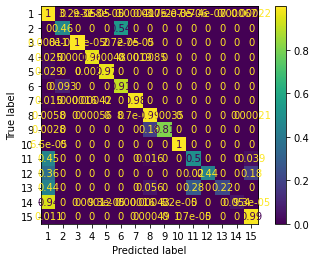

In [95]:
plot_confusion_matrix(KNN ,X_test, y_test, normalize='true')

In [ ]:
"""def scaller_tester_models(X_train, X_test, y_train, y_test):    
    standart_scaler = StandardScaler()
    robust_scaler = RobustScaler()
    
    X_train_standart_scaller = pd.DataFrame(data=standart_scaler.fit_transform(X_train), \
                                            columns=importnace_feateres)
    X_train_robust_scaller = pd.DataFrame(data=robust_scaler.fit_transform(X_train), \
                                          columns=importnace_feateres)
    
    model_1 = KNeighborsClassifier(n_neighbors = 4)
    model_2 = KNeighborsClassifier(n_neighbors = 4)
    model_3 = KNeighborsClassifier(n_neighbors = 4)
    
    model_1.fit(X_train, y_train)
    model_2.fit(X_train_standart_scaller, y_train)
    model_3.fit(X_train_robust_scaller, y_train)
    
    model_1.predict(X_test)
    model_2.predict(X_test)
    model_3.predict(X_test)
    
    return model_1, model_2, model_3 """